<a href="https://colab.research.google.com/github/baradmukta/eda-capstone-project-1/blob/main/eda_capstone_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Exploratory Data Analysis**

###**contribution : Individual** 
###**Project name : Airbnb Booking Analysis**

# **Problem Statement**
  ### **Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today Airbnb became one of a kind service that is used and recognised by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. these millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customer's and provider's (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.**

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

***airbnb is a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.***

*id = unique id*

*name = name of listing* 

*host id = unique host id*

*host name = name of the host*

*neighbourhood group = location*

*neighbourhood = area*

*lattitude = listing lattitude*

*longitude = listing longitude*

*room type = type of listing (entire room, private room, shared room)*

*price = price of listing*

*minimum nights = minimum nights to be paid for*

*number_of_reviews = number of reviews*

*last_review = date of the last review*

*reviews_per_month = number of checks per month*

*calculated_host_listings_count = total count of listing done by host on airbnb in particular neighbourhood*

*availability_365 = availability around the year*


**Github link**

https://github.com/baradmukta?tab=repositories

###**Import Libraries** and **mount the drive**

In [162]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [164]:
# upload the data using pandas module
airbnb=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [165]:
# read the first five rows
airbnb.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,2539,2595,3647,3831,5022,5099,5121,5178,5203,5238
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm
host_id,2787,2845,4632,4869,7192,7322,7356,8967,7490,7549
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Ben
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt
price,149,225,150,89,80,200,60,79,79,150


In [166]:
# estimated revenues
airbnb['revenues'] = airbnb['price']*airbnb['minimum_nights']
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenues
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55


In [167]:
# rows and columns count
airbnb.shape

(48895, 17)

In [168]:
# Dataset info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [169]:
# checking the null value counts
print(airbnb.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
revenues                              0
dtype: int64


there are missing / null values in host name, name, last review, reviews per month. 

In [170]:
# check columns in the data
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'revenues'],
      dtype='object')

In [171]:
# describe the data
airbnb.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
id,48895,19017143,10983108,2539,9471945,19677284,29152178,36487245
host_id,48895,67620010,78610967,2438,7822033,30793816,107434423,274321313
latitude,48895,40,0,40,40,40,40,40
longitude,48895,-73,0,-74,-73,-73,-73,-73
price,48895,152,240,0,69,106,175,10000
minimum_nights,48895,7,20,1,1,3,5,1250
number_of_reviews,48895,23,44,0,1,5,24,629
reviews_per_month,38843,1,1,0,0,0,2,58
calculated_host_listings_count,48895,7,32,1,1,1,2,327
availability_365,48895,112,131,0,0,45,227,365


here **price, minimum nights, number of reviews, reviews per month, calculated host listing count, availability of room during 365 are the numerical data**.
minimum price is 0 and maximum is 10,000.
**average price** per listing is 152.
on an **average people stay for 7 days** in a room, and maximum for 1250. **average number of reviews** per host is 23 and highest is 629. **average availability of rooms** over the year is 112. **average host listing count is 7** and highest is 327.

In [172]:
# describe the categorical data
airbnb.describe(include='O').T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


from this describe table we can conclude that **name, host name, neighbourhood group, neighbourhood, room type, last review are categorical variable**. highest listing is in **Manhattan** neighbourhood group and **Williamsburg** neighbourhood. highest preferences for **Entire home/apt** by customer.

In [173]:
# we will get information about id and host id
print(airbnb['id'].nunique())
print(airbnb['host_id'].nunique())
print(airbnb['host_name'].nunique())

48895
37457
11452


there are unique id for every listing. there are 37457 host id. each host id is different as per the room type, location.

In [174]:
# lets check highest listing on airbnb of particular host in particular neighnourhood
Sonder_host = airbnb[airbnb['calculated_host_listings_count']==327]
Sonder_host

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenues
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309,8758
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219,6641
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159,6728
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91,524
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339,3915
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342,4785
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347,4785
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327,20271


here we can see that **highest listing** is of Sonder(host id-219517861 and calculated host listings count-327) host in **Manhattan neighbourhood group** in **Financial/Theatre District for entire home room type**. **Sonder is the busiest host** as per the listing count as well as the availability of room over the year.

In [175]:
airbnb[airbnb['host_id']==107434423]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenues
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,308,30,0,NaN,NaN,232,156,9240
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,2018-08-17,0.09,232,310,8130
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt,289,30,0,NaN,NaN,232,223,8670
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,2019-01-15,0.17,232,326,9150
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt,323,30,0,NaN,NaN,232,316,9690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaN,NaN,232,325,9480
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaN,NaN,232,338,11550
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaN,NaN,232,228,8010
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaN,NaN,232,188,8340


In [176]:
#let's see some pattern of host name
airbnb[airbnb['host_name']=='John']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenues
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0,525
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219,2250
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0,3900
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74,1440
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21,270
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176,1190
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176,595


there is **relation between host_name, host_id and calculated host listings count**. **host_name can be same but but host_id is different**. e.g. John. there are so many host of naming John. but every person having name John get different host_id.
from this we can conclude that **there can be more than 2 host of naming John**.  

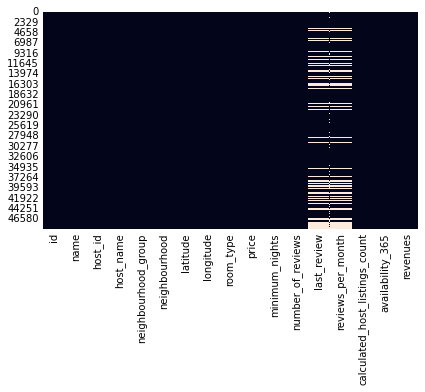

In [177]:
#heatmap of null values
sns.heatmap(airbnb.isnull(), cbar=False);

here we can say there are much more null values in last reviews and reviews per month.

###**Data Cleaning**

In [178]:
# here we will delete unnecessary column like last reviews,name. because there is no relevance of last reviews and name of listing in our data.
airbnb.drop(['last_review','name'],axis=1,inplace=True)
airbnb.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,149
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,225
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,450
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,89
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,800


In [179]:
# here we will replace all missing values in reviews per month with 0
airbnb['reviews_per_month'].fillna(0,inplace=True)
airbnb

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,149
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,225
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,450
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,89
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,140
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,160
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,1150
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,55


In [180]:
#check if any value is null
airbnb.isnull().sum()

id                                 0
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
revenues                           0
dtype: int64

there are 21 host name missing.

In [181]:
# we will not consider the rows where host name is missing. there will be not much impact on data since percentage of data of host name is negligible
airbnb=airbnb[~airbnb['host_name'].isnull()]
airbnb

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,149
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,225
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,450
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,89
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,140
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,160
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,1150
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,55


In [182]:
# let's check how many variation takes place after data cleaning 
airbnb.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
id,48874,19019875,10983179,2539,9474068,19679355,29153423,36487245
host_id,48874,67621569,78614153,2438,7823257,30792573,107434423,274321313
latitude,48874,40,0,40,40,40,40,40
longitude,48874,-73,0,-74,-73,-73,-73,-73
price,48874,152,240,0,69,106,175,10000
minimum_nights,48874,7,20,1,1,3,5,1250
number_of_reviews,48874,23,44,0,1,5,24,629
reviews_per_month,48874,1,1,0,0,0,1,58
calculated_host_listings_count,48874,7,32,1,1,1,2,327
availability_365,48874,112,131,0,0,45,227,365


there is not much variation after excluding some rows of host name.

In [183]:
# let's check how much variation takes place after data cleaning
airbnb.describe(include='O').T

,count,unique,top,freq
host_name,48874,11452,Michael,417
neighbourhood_group,48874,5,Manhattan,21652
neighbourhood,48874,221,Williamsburg,3919
room_type,48874,3,Entire home/apt,25400


there is not much variation in the description after data cleaning.

In [184]:
airbnb.nunique()

id                                48874
host_id                           37439
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19042
longitude                         14717
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
revenues                           2125
dtype: int64

##**Data Visualization and Grouping**

In [185]:
# check the highest revenue earning host
airbnb1 = airbnb.sort_values(by='revenues',ascending=False)
airbnb1

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
48043,36056808,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,0.00,1,365,1170000
9151,7003697,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,1000000
12342,9528920,3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,989901
17811,13963005,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350,365,0,0.00,1,364,857750
44429,34221161,9295237,Noelle,Queens,Astoria,40.75593,-73.91276,Private room,2000,365,0,0.00,2,0,730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795,20639792,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232,0
25794,20639628,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176,0
25778,20624541,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73,0
25433,20333471,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127,0


highest revenue earned by host **Jenny(Manhattan NG, Tribeca N, Entire home)** whose price is 6500, by one customer of listing id **36056808** . 

In [186]:
airbnb[airbnb['price']==10000]

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
9151,7003697,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,1000000
17692,13894339,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,50000
29238,22436899,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83,300000


highest price among the host is of **Kathrine(Queens NG, Astoria N, private room), Erin(Brooklyn NG, Greenpoint N, entire home/apt), Jelena(Manhattan NG, Upper West Side N, entire home/apt)**. 

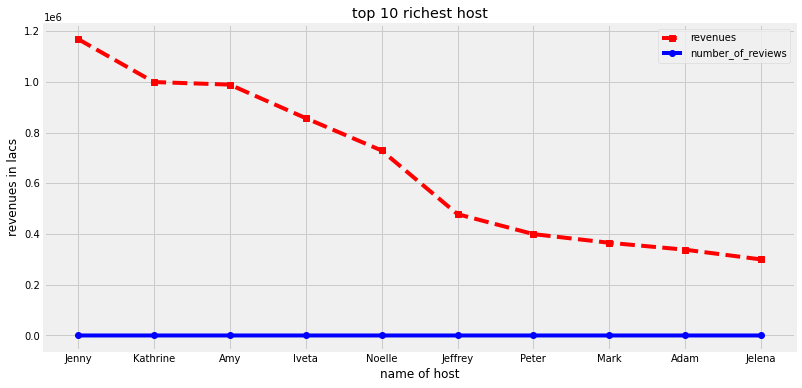

In [187]:
# plot the top 10 host who earn the most by single listing
plt.figure(figsize=(12,6))
plt.plot(airbnb1.host_name.head(10),airbnb1.revenues.head(10),'s--r')
plt.plot(airbnb1.host_name.head(10),airbnb1.number_of_reviews.head(10),'o-b')
plt.title('top 10 richest host')
plt.xlabel('name of host')
plt.ylabel('revenues in lacs')
plt.legend(['revenues','number_of_reviews']);

top **richest host** by listing only one asset are **Jenny**, Kathrine, Amy, Iveta.... we can see from the graph tha the richest host has revenue is between 11 lacs to 12 lacs. also we can see that Jenny has highest revenues but has zero number of reviews. means there is **no affect of reviews on the earning of the host**.

In [188]:
# grouping of hosts by their listing count and neighbourhood group
table_of_neighbourhood = airbnb.groupby(['calculated_host_listings_count','host_name','host_id','neighbourhood_group']).agg({'revenues':'sum','number_of_reviews':'sum','id':'count'}).rename(columns={'revenues':'total_revenue','number_of_reviews':'total_reviews','id':'count of ids'})
table_of_neighbourhood.head(10)

total_revenue  \
calculated_host_listings_count host_name                host_id   neighbourhood_group                  
1                              'Cil                     45354224  Queens                         240   
                               (Ari) HENRY LEE          40605120  Manhattan                      980   
                               (Email hidden by Airbnb) 5610823   Brooklyn                       261   
                                                        11495251  Manhattan                     1000   
                                                        11740339  Brooklyn                       240   
                                                        65527002  Manhattan                       90   
                               (Mary) Haiy              100757200 Brooklyn                       126   
                               -TheQueensCornerLot      128580688 Queens                         150   
                               0123                     229693987 Manhattan                      600   
                               2018Serenity             202318295 Manhattan                      250   

                                                                                       total_reviews  \
calculated_host_listings_count host_name                host_id   neighbourhood_group                  
1                              'Cil                     45354224  Queens                         240   
                               (Ari) HENRY LEE          40605120  Manhattan                        3   
                               (Email hidden by Airbnb) 5610823   Brooklyn                         5   
                                                        11495251  Manhattan                        1   
                                                        11740339  Brooklyn                         0   
                                                        65527002  Manhattan                       60   
                               (Mary) Haiy              100757200 Brooklyn                       188   
                               -TheQueensCornerLot      128580688 Queens                          51   
                               0123                     229693987 Manhattan                        0   
                               2018Serenity             202318295 Manhattan                        4   

                                                                                       count of ids  
calculated_host_listings_count host_name                host_id   neighbourhood_group                
1                              'Cil                     45354224  Queens                          1  
                               (Ari) HENRY LEE          40605120  Manhattan                       1  
                               (Email hidden by Airbnb) 5610823   Brooklyn                        1  
                                                        11495251  Manhattan                       1  
                                                        11740339  Brooklyn                        1  
                                                        65527002  Manhattan                       1  
                               (Mary) Haiy              100757200 Brooklyn                        1  
                               -TheQueensCornerLot      128580688 Queens                          1  
                               0123                     229693987 Manhattan                       1  
                               2018Serenity             202318295 Manhattan                       1

In [189]:
table_of_neighbourhood.sort_values(by='total_revenue',ascending=False).head(10)

total_revenue  \
calculated_host_listings_count host_name      host_id   neighbourhood_group                  
232                            Blueground     107434423 Manhattan                  2240880   
1                              Jenny          271248669 Manhattan                  1170000   
121                            Kara           30283594  Manhattan                  1164243   
1                              Kathrine       20582832  Queens                     1000000   
                               Amy            3906464   Manhattan                   989901   
327                            Sonder (NYC)   219517861 Manhattan                   950453   
1                              Iveta          41870118  Queens                      857750   
2                              Noelle         9295237   Queens                      730650   
65                             Pranjal        200380610 Manhattan                   664320   
96                             Jeremy & Laura 16098958  Manhattan                   601800   

                                                                             total_reviews  \
calculated_host_listings_count host_name      host_id   neighbourhood_group                  
232                            Blueground     107434423 Manhattan                       29   
1                              Jenny          271248669 Manhattan                        0   
121                            Kara           30283594  Manhattan                       65   
1                              Kathrine       20582832  Queens                           2   
                               Amy            3906464   Manhattan                        6   
327                            Sonder (NYC)   219517861 Manhattan                     1281   
1                              Iveta          41870118  Queens                           0   
2                              Noelle         9295237   Queens                           2   
65                             Pranjal        200380610 Manhattan                        1   
96                             Jeremy & Laura 16098958  Manhattan                      138   

                                                                             count of ids  
calculated_host_listings_count host_name      host_id   neighbourhood_group                
232                            Blueground     107434423 Manhattan                     230  
1                              Jenny          271248669 Manhattan                       1  
121                            Kara           30283594  Manhattan                     121  
1                              Kathrine       20582832  Queens                          1  
                               Amy            3906464   Manhattan                       1  
327                            Sonder (NYC)   219517861 Manhattan                     327  
1                              Iveta          41870118  Queens                          1  
2                              Noelle         9295237   Queens                          2  
65                             Pranjal        200380610 Manhattan                      65  
96                             Jeremy & Laura 16098958  Manhattan                      96

here we can see that,**highest revenue earned by Blueground(host_id-107434423)** having 2nd highest listing count(232) on airbnb. and **second highest revenue earned by Jenny(host_id-271248669)** but his listing on airbnb is only one.

In [190]:
table_of_neighbourhood.sort_values(by='total_reviews',ascending=False).head(10)

,,,,total_revenue,total_reviews,count of ids
calculated_host_listings_count,host_name,host_id,neighbourhood_group,,,
5,Maya,37312959,Queens,213,2273,5
13,Brooklyn& Breakfast -Len-,344035,Brooklyn,970,2205,13
5,Danielle,26432133,Queens,236,2017,5
11,Yasu & Akiko,35524316,Manhattan,2055,1971,11
7,Brady,40176101,Brooklyn,523,1818,7
3,Jj,4734398,Manhattan,147,1798,3
12,Alex And Zeena,16677326,Manhattan,1020,1355,12
15,Randy,6885157,Brooklyn,851,1346,15
327,Sonder (NYC),219517861,Manhattan,950453,1281,327


from above table, we can see that, **Maya(host_id-37312959)** has the **highest reviews** in the **neighbourhood group Queens** on airbnb but earned least revenue by listing. here we can see that **Sonder(NYC)(host_id-219517861)** has positioned on **9th place for reviews**, **highest in listing count**, and at **5th position by revenue earning**.

In [191]:
#highest revenue earning neighbourhood group
highest_revenue = airbnb.groupby('neighbourhood_group')['revenues'].mean()
highest_revenue

neighbourhood_group
Bronx             346.884404
Brooklyn          807.050261
Manhattan        1890.740763
Queens            893.618468
Staten Island     533.378016
Name: revenues, dtype: float64

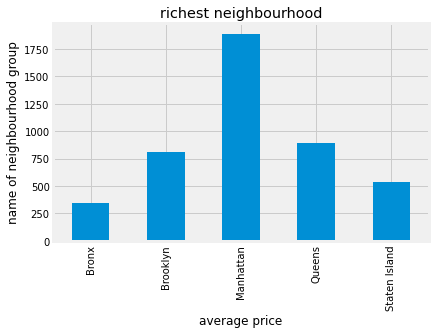

In [192]:
# highest earning neighbourhood group
highest_revenue.plot(kind='bar')
plt.title('richest neighbourhood')
plt.xlabel('average price')
plt.ylabel('name of neighbourhood group')
plt.show()

highest revenue is earned by the neighbourhood group Manhatten.we can conclude that **Manhattan** area is much **crowdy** or **most demanded location**.

highest number of reviews is of **Manhattan** neighbourhood group for **entire home** room type which is **13196**.highest number of reviews of **private room** type is in **Brooklyn** neighbourhood group which is **10128**.the least number of reviews is of shared room type. we can conclude that people prefer the entire home most often followed by private room.

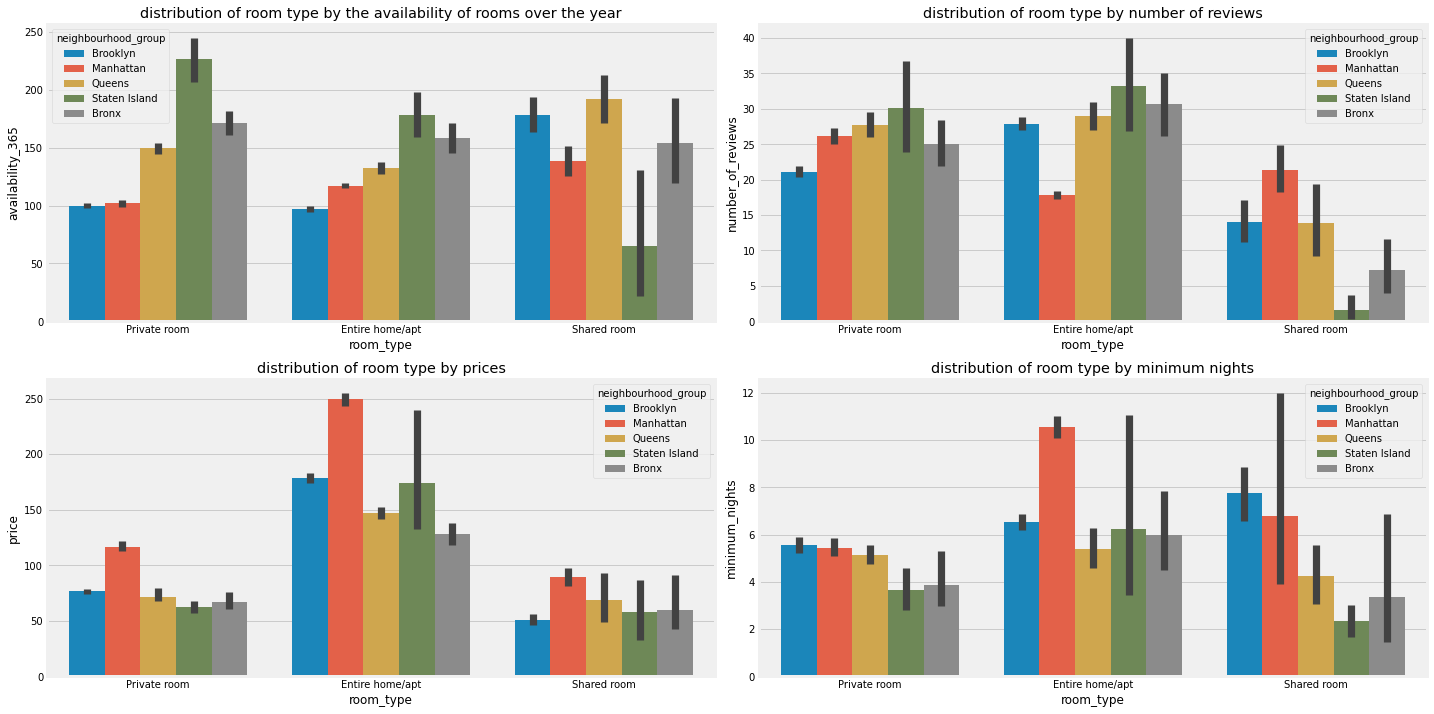

In [220]:
# vizualization of number pf reviews, price, availability of rooms over the year, minimum nights
fig,axes =plt.subplots(2,2,figsize=(20,10))

axes[0,0].set_title('distribution of room type by the availability of rooms over the year')
sns.barplot(x=airbnb.room_type,y=airbnb.availability_365,hue=airbnb.neighbourhood_group,ax=axes[0,0]) # availability of rooms over the year in different neighbourhood group

axes[0,1].set_title('distribution of room type by number of reviews')
sns.barplot(x=airbnb.room_type,y=airbnb.number_of_reviews,hue=airbnb.neighbourhood_group,ax=axes[0,1]) # number of reviews by room type in different neighbourhood group

axes[1,0].set_title('distribution of room type by prices')
sns.barplot(x=airbnb.room_type,y=airbnb.price,hue=airbnb.neighbourhood_group,ax=axes[1,0]) # variation of price by room type in different neighbourhood group

axes[1,1].set_title('distribution of room type by minimum nights')
sns.barplot(x=airbnb.room_type,y=airbnb.minimum_nights,hue=airbnb.neighbourhood_group,ax=axes[1,1]) # variation of night by room type in different neighbourhood group

plt.tight_layout(pad=1)

* ***table 1*** : **highest average availability of room over the year is for Private room(Staten Island NG)**. 2nd highest average is of shared room(Queens NG). and **least average availability of room and highest deviation among data is for shared room(Staten Island)**. 
*  ***table 2*** : the average **highest number of reviews is of Staten Island(Entire home)**. and 2nd highest average is of Bronx(Entire home) neighbourhood group. 
* ***table 3*** : in every room type, average **highest price** is of **Manhattan neighbourhood group**. and people pay **highest price** for **entire home** followed by private and share room. highest **variation of prices** is in **Staten Island neighbourhood group for entire home**.
* ***table 4*** : here we can see **highest average night** where cutomer stays is in the **Manhatten neighbourhood group** of entire home room type. **highest variation in the nights** can be seen in **Manhatten neighbourhood group** of **share room type**.

In [223]:
# here is the data of above graph for cross check
table_of_neighbourhood = airbnb.groupby(['neighbourhood_group','room_type']).agg({'price':'mean','minimum_nights':'mean','id':'count','availability_365':'mean','number_of_reviews':'sum'}).rename(columns={'price':'mean_of_price','minimum_nights':'mean_of_nights','id':'count_of_unique_id','number_of_reviews':'sum_of_reviews'})
table_of_neighbourhood

mean_of_price  mean_of_nights  \
neighbourhood_group room_type                                        
Bronx               Entire home/apt     127.645503        5.962963   
                    Private room         66.788344        3.858896   
                    Shared room          59.800000        3.366667   
Brooklyn            Entire home/apt     178.355453        6.530982   
                    Private room         76.510861        5.539791   
                    Shared room          50.527845        7.753027   
Manhattan           Entire home/apt     249.240831       10.540997   
                    Private room        116.787613        5.449975   
                    Shared room          88.977083        6.766667   
Queens              Entire home/apt     147.050573        5.369752   
                    Private room         71.776855        5.122552   
                    Shared room          69.020202        4.232323   
Staten Island       Entire home/apt     173.846591        6.238636   
                    Private room         62.292553        3.632979   
                    Shared room          57.444444        2.333333   

                                     count_of_unique_id  availability_365  \
neighbourhood_group room_type                                               
Bronx               Entire home/apt                 378        158.349206   
                    Private room                    652        171.331288   
                    Shared room                      60        154.216667   
Brooklyn            Entire home/apt                9554         97.151141   
                    Private room                  10128         99.950632   
                    Shared room                     413        178.007264   
Manhattan           Entire home/apt               13196        117.151182   
                    Private room                   7976        101.876630   
                    Shared room                     480        138.572917   
Queens              Entire home/apt                2096        132.267176   
                    Private room                   3370        149.285163   
                    Shared room                     198        192.186869   
Staten Island       Entire home/apt                 176        178.073864   
                    Private room                    188        226.361702   
                    Shared room                       9         64.777778   

                                     sum_of_reviews  
neighbourhood_group room_type                        
Bronx               Entire home/apt           11590  
                    Private room              16312  
                    Shared room                 432  
Brooklyn            Entire home/apt          266739  
                    Private room             213650  
                    Shared room                5793  
Manhattan           Entire home/apt          235066  
                    Private room             208823  
                    Shared room               10272  
Queens              Entire home/apt           60644  
                    Private room              93513  
                    Shared room                2745  
Staten Island       Entire home/apt            5857  
                    Private room               5670  
                    Shared room                  14

 * Highest **demand in Manhatten neighbourhood** is **for entire home**. **highest availability of rooms for staying** is in Manhatten neighbourhood group **for entire home/apt room type** followed by Brooklyn neighbourhood group for Shared room type. and **highest frequency of listing** is in **manhattan neighbourhood group** only. **maximum available days of room is in staten island** neighbourhood group.
 * highest number of reviews is of **Brooklyn** neighbourhood group for **entire home** room type which is **266739**.the least number of reviews is of **shared room type(Staten Island)**. 

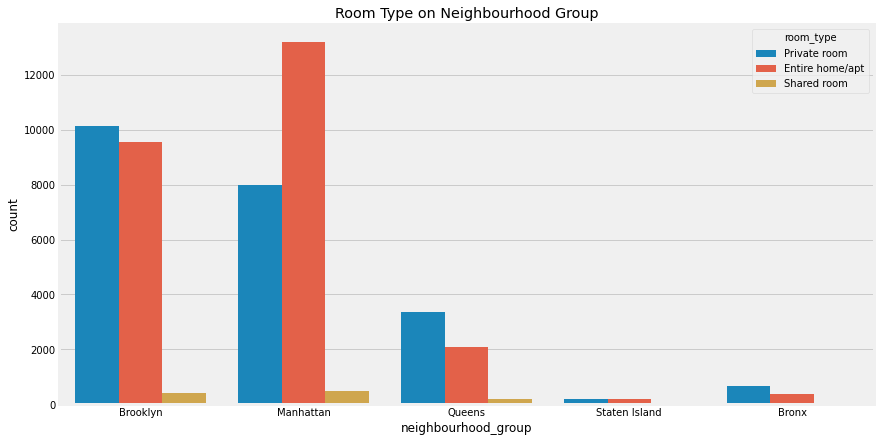

In [197]:
#let's count the listing of different neighbourhood group
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x=airbnb['neighbourhood_group'],hue=airbnb['room_type'])
plt.show();

**highest listing by the customer is in Manhattan(for entire home)** neighbourhood group followed by Brooklyn(for private room).

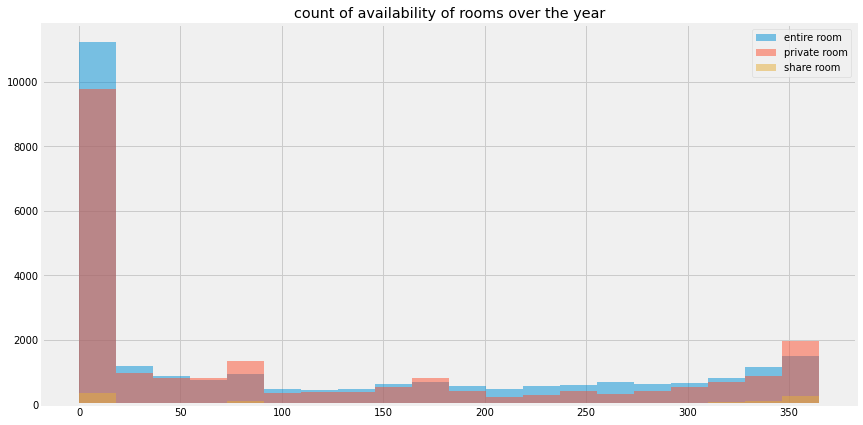

In [198]:
#lets count the availability of room over the year
entire_room = airbnb[airbnb['room_type']=='Entire home/apt']
private_room = airbnb[airbnb['room_type']=='Private room']
share_room = airbnb[airbnb['room_type']=='Shared room']

plt.figure(figsize=(13,7))
plt.title("count of availability of rooms over the year")
plt.hist(entire_room.availability_365,bins=20,alpha=0.5)
plt.hist(private_room.availability_365,bins=20,alpha=0.5)
plt.hist(share_room.availability_365,bins=20,alpha=0.5)
plt.legend(['entire room','private room','share room'])


plt.show();

here we can see that there is much less availability of room. **most of the rooms are available only for 0-20 days probably**.

In [199]:
# count of neighbourhood
airbnb1 = airbnb.groupby(['neighbourhood','neighbourhood_group']).agg({'id':'count','price':'sum'}).sort_values(by='id',ascending=False)
airbnb1.head(20)

,,id,price
neighbourhood,neighbourhood_group,,
Williamsburg,Brooklyn,3919,563562
Bedford-Stuyvesant,Brooklyn,3714,399917
Harlem,Manhattan,2656,316119
Bushwick,Brooklyn,2464,208996
Upper West Side,Manhattan,1970,415540
Hell's Kitchen,Manhattan,1955,400627
East Village,Manhattan,1853,344812
Upper East Side,Manhattan,1797,339404
Crown Heights,Brooklyn,1563,175869


**highest listing** is in Williamsburg neighbourhood, Brooklyn neighbourhood group.**2nd highest is also in Brooklyn neighbourhood group** which is **Bedford-Stuyvesant**.and 3rd highest is in **Harlem neighbourhood** Manhattan neighbourhood group. to 10 neighbourhood is in Manhattan and Brooklyn neighbourhood group.

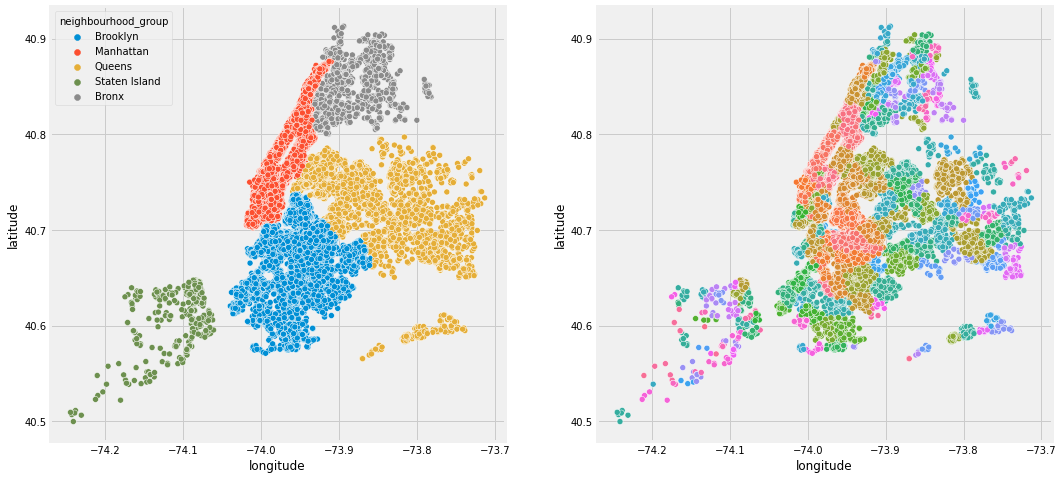

In [200]:
# distribution of neighbourhood group and neighbourhood along lattitude and longitude
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(data=airbnb['neighbourhood_group'],x=airbnb['longitude'],y=airbnb['latitude'],hue=airbnb['neighbourhood_group']);

plt.subplot(1,2,2)
x = sns.scatterplot(data=airbnb['neighbourhood'],x=airbnb['longitude'],y=airbnb['latitude'],hue=airbnb['neighbourhood']);
x.legend_ = None

plt.show()

here the **wide distribution** is of **Queens neighbourhood group** which lies between lattitude range of 40.8 to 40.55 and longitude range of -74.0 to -73.7.

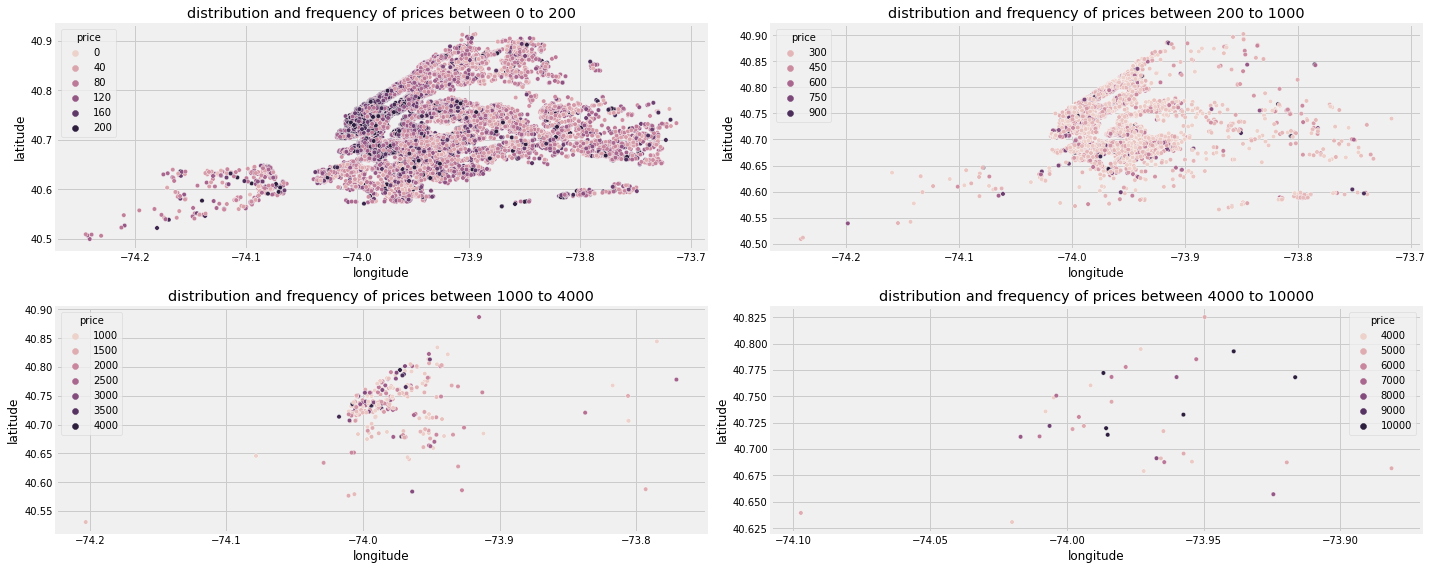

In [201]:
#distribution and frequency of prices in different region
fig,axes =plt.subplots(2,2,figsize=(20,8))

axes[0,0].set_title('distribution and frequency of prices between 0 to 200')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[airbnb['price']<=200].price,s=20,ax=axes[0,0])

axes[0,1].set_title('distribution and frequency of prices between 200 to 1000')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[(200<=airbnb['price'])&(airbnb['price']<=1000)].price,s=20,ax=axes[0,1])

axes[1,0].set_title('distribution and frequency of prices between 1000 to 4000')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[(1000<=airbnb['price'])&(airbnb['price']<=4000)].price,s=20,ax=axes[1,0])

axes[1,1].set_title('distribution and frequency of prices between 4000 to 10000')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[(4000<=airbnb['price'])&(airbnb['price']<=10000)].price,s=20,ax=axes[1,1])

plt.tight_layout(pad=1)

here we can see that **highest frequency of price range** is between **0 to 200** followed by 200 to 1000. **least frequency** is in the **price range of 4000 to 10000**.

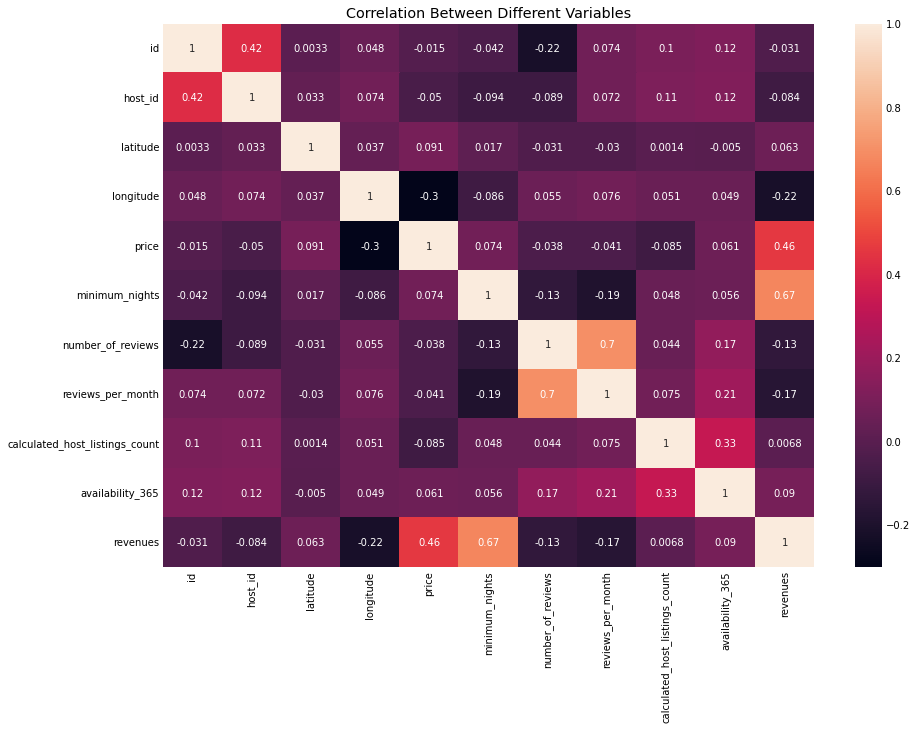

In [202]:
#correlation between different attributes
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables")
sns.heatmap(corr, annot=True)
plt.show()

here the **highest correlation is between the number of reviews and reviews per month**. followed by revenues and prices.

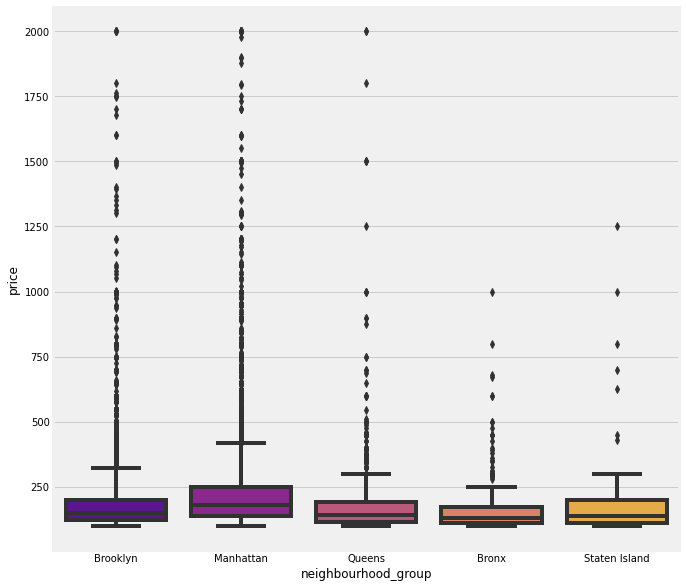

In [203]:
# boxplot for price between 100 to 2000
price_above_100 = airbnb[(airbnb['price']>=100)&(airbnb['price']<=2000)]
plt.figure (figsize= (10,10))
ax= sns.boxplot(data=price_above_100,x='neighbourhood_group',y='price',palette='plasma')

**in prices range** there is **no limit of fixing the prices**. hence **there are so many outliers occured in the prices**.

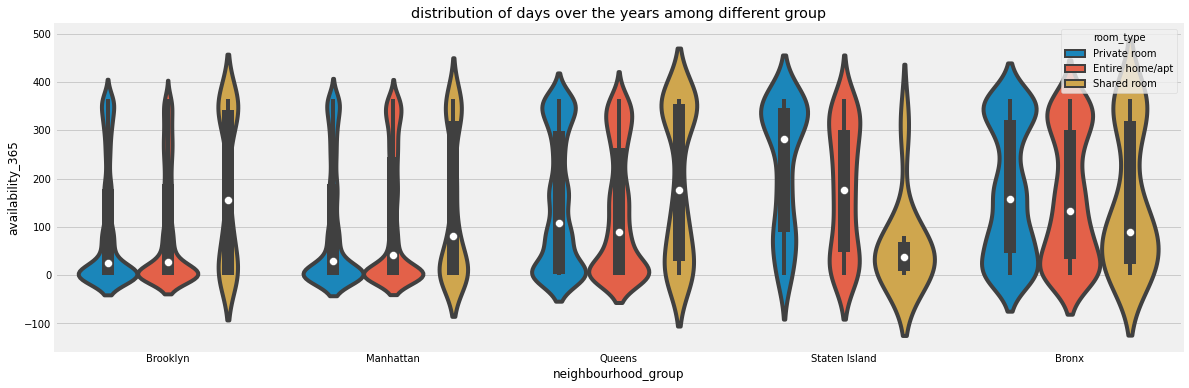

In [204]:
# violinplot for availability of days over the years
plt.figure(figsize=(18,6))
sns.violinplot(data=airbnb,x='neighbourhood_group',y='availability_365',hue='room_type')
plt.title('distribution of days over the years among different group');

here from violinplot, we can conclude that, **highest distribution** of availability of room over year is between **0-100 days** among **bronx neighbourhood group and shared room type**. minimum availability is 0 days. and **highest density is for 0 days only**.i.e. customer prefer 0 days availability of room over the year. **highest median of availability of room is of Staten Island(private room)**.

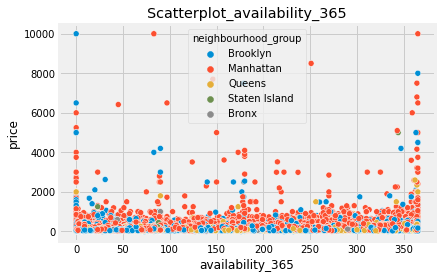

In [205]:
#variation of price among different neighbourhood group
ax = sns.scatterplot(data=airbnb,x='availability_365',y='price',hue='neighbourhood_group')
plt.title('Scatterplot_availability_365');

From above plot we can see that most of the **rooms prefered by customers** are in the  **range of 0 to 2000**.
Very few are available for price above 2000$,this is quite obivious that there are very few peoples who prefer to have expensive rooms.
we can see that most of the **high range of price** is of **Manhattan and Brooklyn neighbourhood group**. also there are so many outliers in price ranges.

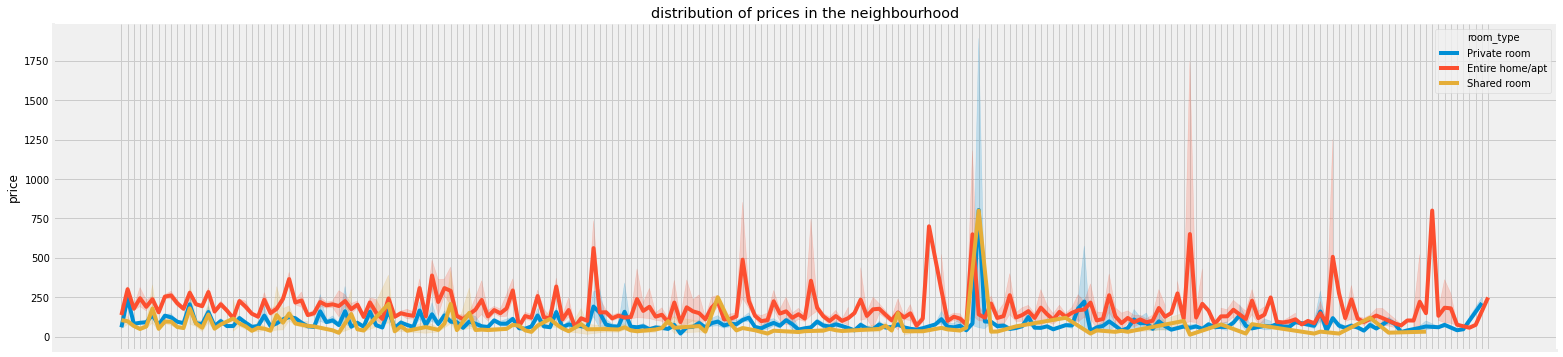

In [206]:
fig = plt.figure(figsize=(24, 6))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
sns.lineplot(data=airbnb,x='neighbourhood',y='price',hue='room_type')
plt.title('distribution of prices in the neighbourhood')
sns.despine(fig)

Most of the neighbourhood has kept the ***price range of all room type*** between **0-250**. highest average range of price is for entire home by the neighbourhood.

In [207]:
categorical_data = airbnb[['id','host_name','number_of_reviews','neighbourhood_group','neighbourhood','price','room_type','minimum_nights','availability_365']].sort_values('minimum_nights',ascending=False)
categorical_data1 = categorical_data.head(20)
categorical_data1

,id,host_name,number_of_reviews,neighbourhood_group,neighbourhood,price,room_type,minimum_nights,availability_365
5767,4204302,Genevieve,2,Manhattan,Greenwich Village,180,Entire home/apt,1250,365
2854,1615764,Peter,0,Manhattan,Battery Park City,400,Entire home/apt,1000,362
38664,30378211,Meg,0,Manhattan,Greenwich Village,110,Shared room,999,365
26341,20990053,Angie,24,Brooklyn,Williamsburg,79,Private room,999,249
13404,10053943,Glenn H.,2,Manhattan,Harlem,99,Entire home/apt,999,42
8014,6169897,John,0,Manhattan,Harlem,75,Entire home/apt,500,362
14285,11096888,Amanda,0,Brooklyn,Kensington,45,Private room,500,358
47620,35834935,Meg,0,Brooklyn,Williamsburg,140,Entire home/apt,500,331
11193,8668115,Laura,10,Brooklyn,Crown Heights,50,Private room,500,365
7355,5431845,Aliya,30,Queens,Long Island City,134,Entire home/apt,500,90


maximum stay of nights is by **listing id-4204302** in the **Manhattan NG and Greenwitch Village Neighbourhood** rented by the host **Genevieve** also **availability** of that particular **entire home** is **over the year**. here we can see that price is reasonable which is **180$**. we can conclude that customer prefered to stay in the long run where the ***price rate is reasonable*** and which **area is much more popular** which is of Manhattan. also we can see that people prefer mostly Manhattan neighbourhood group for long stay.

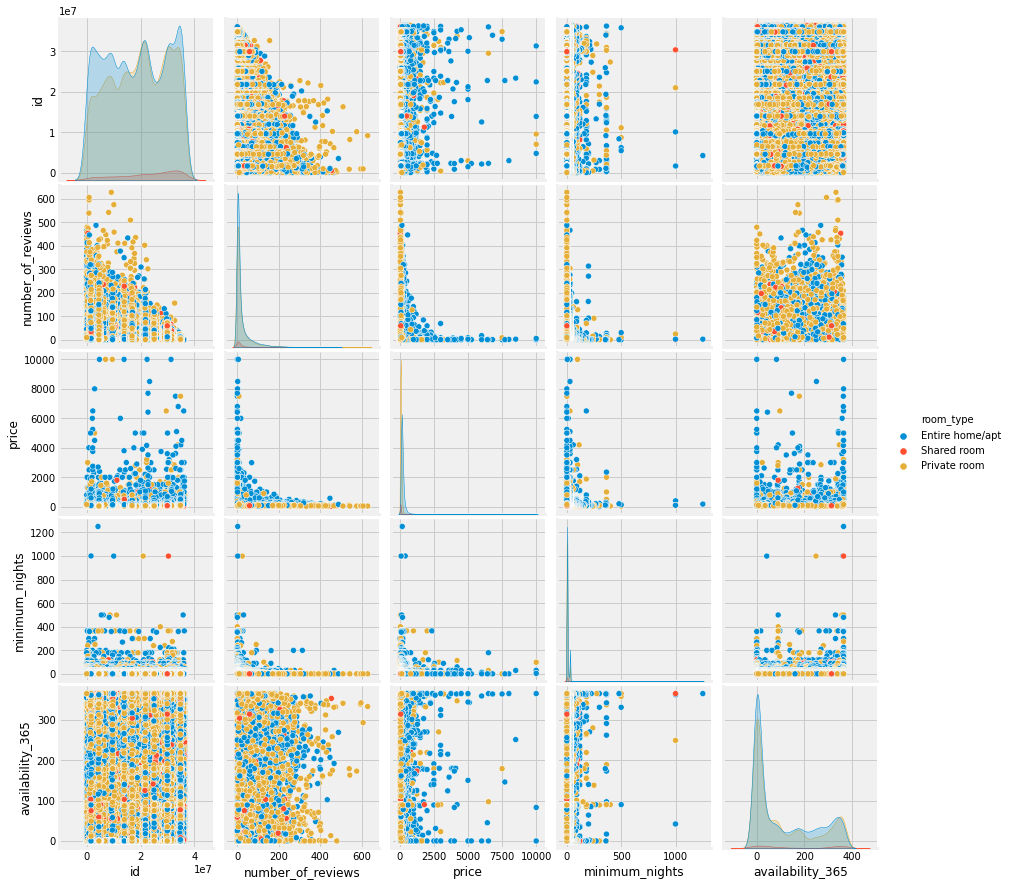

In [208]:
sns.pairplot(categorical_data,hue='room_type');

we can see from above pairplot that as the price increases number of reviews decreases. and the **lower price = higher number of reviews**. also we can see that **most of the number of reviews** are from those who **stay for 0-100 nights**. we can see as we go upper along the minimum night axis it is begining to diminished. also we can say that people mostly prefer to **stay at night at max for 200 days** over the year.
 also we can see that **highest number of reviews** are getting by the listing whose **price range is between 0-100$**. also **highest number of reviews is getting by the listing of private room type**.

#**Solution to business objective**

  * From the above charts, graphs and pie charts , we get the inference 
that **Manhattan and Brooklyn location is the most prefer by the customer**. maybe its because of availability of public services and popular and lavish area. 
  * We can see from the above that there is no correlation between number of reviews and the choices of the customer while selecting the room. but we should give incentives and promote to increase number of reviews.  
  * Customer mostly prefered room whose **price range is between 0-200**. 
  * People mostly prefered entire home/apartment mostly in Manhattan group.and least in Staten Island.
  * From above tables, we can conclude that, we can't get much information that on what basis people prefered the rooms, location. **there should be more parameter added in this table like amenities and services** which are provided to customer. availability of rooms, beds, distance from the hospital and markets,etc.
  * But from given data, we can conclude that people mostly prefered **Manhattan and Brooklyn neighbourhood group** within the **price range of 0-200**. also there are some effect of number of reviews also. and people/customer mostly prefer the **entire hoom/apt room type**.